# Data Analysis with Python (EDA)

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df=pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


#### Analyzing individual Feature Patterns using Visualization

In [7]:
#we need to know the data types to determine the best visualization method
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [39]:
#correlation shows how change in one varibale affects others in their dependency
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


<AxesSubplot:>

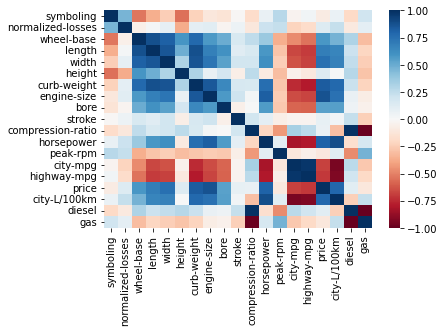

In [41]:
sns.heatmap(df.corr(),cmap='RdBu')

In [14]:
df[["bore","stroke","compression-ratio","horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


## GRAPHICAL PLOTS

#### Continous Numerical Variables

These are variables that may contain any value within a range.They can either be of type int or float. The best way to visualize them is through histograms, regression plots, scatter plots.

Regplots use show scatter plots with a fitted regression plots

(0.0, 53706.36694440118)

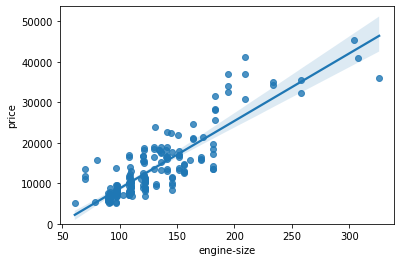

In [20]:
#Positive linear relationship between engine-size and price
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,)

We can see that engine size is a good predictor of price. Has a strong positive linear relationship

In [21]:
df[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


(0.0, 48172.64632091168)

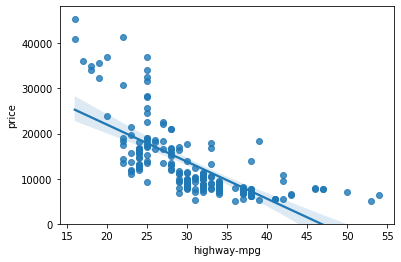

In [23]:
#lets create another reglot of highway-mpg and price
sns.regplot(x="highway-mpg",y="price", data=df)
plt.ylim(0,)

Highway-mpg and price have a strong negative linear relationship.
Hughway-mpg is therefore a good predictor of price

In [24]:
df[["highway-mpg","price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<AxesSubplot:xlabel='stroke', ylabel='price'>

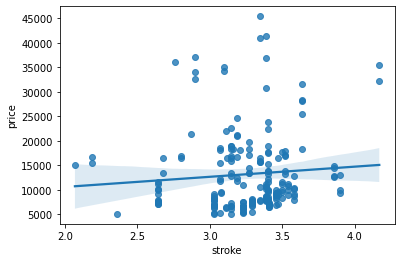

In [27]:
#lets see a weak linear relationship
sns.regplot(x="stroke",y="price", data=df)

Stroke does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.

In [28]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


#### Categorical Variables

Categorical describe a characteristic of a data unit. Categorical variables can have type "Object" or "int64". A good way to visualize categorical variables is using boxplots.

<AxesSubplot:xlabel='body-style', ylabel='price'>

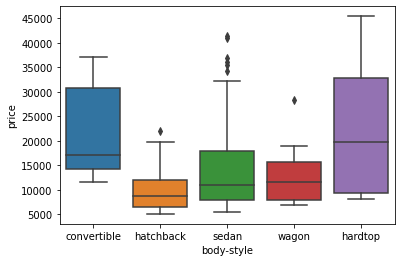

In [31]:
#lets look at the relationship between "body-style" and "price"
sns.boxplot(x="body-style",y="price",data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

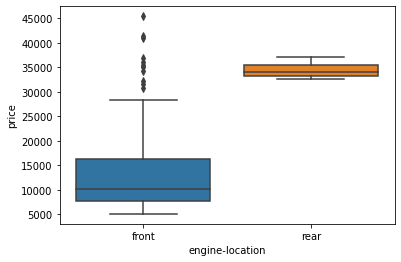

In [32]:
#again lest do engine location against price. It is price that we are interested in
sns.boxplot(x="engine-location",y="price", data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

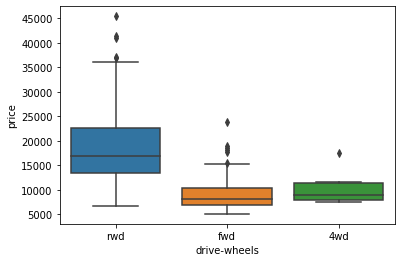

In [33]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

### Descriptive statistical Analysis

In [36]:
#ignores all null values
df.describe()
#this describe method by default skips object type variables(categorical data that is)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [38]:
#in order to include categorical data i.e. object type data
df.describe(include=["object"])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


As shown in the include=["object"] uniue values are counted and the top value together with its frequency

In [46]:
#the value_counts methods works with series and not data_frames
#The result shows as a series and not as a frame
df[["drive-wheels","aspiration"]].value_counts()

drive-wheels  aspiration
fwd           std           102
rwd           std            57
              turbo          18
fwd           turbo          16
4wd           std             6
              turbo           2
dtype: int64

In [150]:
# we can convert the series to a data_frame using the to_frame method
zaga=df["aspiration"].value_counts().to_frame()
zaga.rename(columns={"aspiration":"turbo or what"},inplace=True)
zaga.index.name="Either std or turbo"
zaga

,turbo or what
Either std or turbo,
std,165
turbo,36


In [54]:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [68]:
df["drive-wheels"].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [65]:
#having the value as a data frame means we are able to perform some pandas stuff on it
wheels_counts=df["drive-wheels"].value_counts().to_frame()
wheels_counts.rename(columns={'drive-wheels':'value_counts'},inplace=True)
wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [67]:
#lets now namme the index
wheels_counts.index.name="Wheel drive type"
wheels_counts

,value_counts
Wheel drive type,
fwd,118
rwd,75
4wd,8


In [69]:
#lets do the same for engine location
df["engine-location"].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

In [72]:
eng_loc=df["engine-location"].value_counts().to_frame()
eng_loc

,engine-location
front,198
rear,3


In [74]:
eng_loc.rename(columns={"engine-location":"value-counts"},inplace=True)
eng_loc

,value-counts
front,198
rear,3


In [75]:
eng_loc.index.name="Engine-location"
eng_loc

,value-counts
Engine-location,
front,198
rear,3


## Basics of grouping

In [76]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [95]:
#lets group the types of drive-wheels against average priceprice
Gdata=df[["drive-wheels","price"]]
Gdata=Gdata.groupby("drive-wheels").mean()
Gdata

,price
drive-wheels,
4wd,10241.000000
fwd,9244.779661
rwd,19757.613333


From the above group by method we can see that rwd are on average most expensive while 4wd and fwd are quite similar to each other

In [86]:
#grouping by multiple variables
Gdata2=df[["drive-wheels","body-style","price"]]

In [96]:
Groupby_Table=Gdata2.groupby(["drive-wheels","body-style"],as_index=False).mean()
Groupby_Table

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [98]:
#lets create a pivot table
pivot_Table1=Groupby_Table.pivot(index="drive-wheels",columns="body-style")

In [102]:
pivot_Table1

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [103]:
#lets remve the nan in the pivot table
pivot_Table1.fillna(0)

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<AxesSubplot:xlabel='None-body-style', ylabel='drive-wheels'>

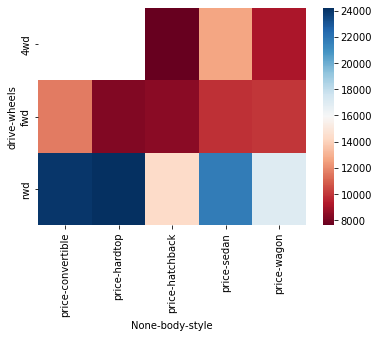

In [108]:
#lets create a heat map to represent this pivot data
sns.heatmap(pivot_Table1,cmap="RdBu")

## Correlation and Causation

Correlation shows how interdependent the relation between different variables is

1: Perfect positive linear correlation.

0: No linear correlation, the two variables most likely do not affect each other.

-1: Perfect negative linear correlation.

P value refers to the confidence degree

p-value is  <  0.001: we say there is strong evidence that the correlation is significant.

the p-value is  <  0.05: there is moderate evidence that the correlation is significant.

the p-value is  <  0.1: there is weak evidence that the correlation is significant.

the p-value is  >  0.1: there is no evidence that the correlation is significant.


In [111]:
from scipy import stats

#### Wheel base vs Price correlation

In [117]:
pearson_coef, p_vlue = stats.pearsonr(df["wheel-base"],df["price"])

In [118]:
pearson_coef

0.584641822265508

In [119]:
p_value

8.076488270733218e-20

##### Conclusion
The p-value is < 0.001 therefore the correlation is statistically significant even though the correlation coefficient 0.58 is not very strong

#### Horsepower vs price

In [121]:
pearson_coef, p_value = stats.pearsonr(df["horsepower"],df["price"])

In [122]:
pearson_coef

0.8095745670036559

In [123]:
p_value

6.369057428260101e-48

##### Conclusion

The P value is < 0.001 which shows confidence/certainity with the strong +ve linear relationship. Therefore Horsepower is statistically significant in price determination

#### Length vs Price

In [124]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
pearson_coef, p_value

(0.6906283804483638, 8.016477466159556e-30)

##### Conclusion

The P_value is < 0.001 therefore the correlation between length and price is statistically significant. The correlation coefficient shows a strong linear relationship

#### Width vs Price

In [125]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
pearson_coef, p_value

(0.7512653440522672, 9.20033551048217e-38)

##### Conclusion

The P_value is < 0.001 therefore the correlation between width and price is statistically significant. The correlation coefficient shows a strong linear relationship

#### Curb-weight vs Price

In [126]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
pearson_coef, p_value

(0.8344145257702843, 2.189577238894065e-53)

##### Conclusion

The P_value is < 0.001 therefore the correlation between curb-weight and price is statistically significant. The correlation coefficient shows a strong positive linear relationship

#### Engine-size vs Price

In [127]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
pearson_coef, p_value

(0.8723351674455182, 9.265491622200232e-64)

##### Conclusion

The P_value is < 0.001 therefore the correlation between engine-size and price is statistically significant. The correlation coefficient shows a strong positive linear relationship

#### Bore vs Price

In [128]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
pearson_coef, p_value

(0.5431553832626603, 8.049189483935261e-17)

##### Conclusion

The P_value is < 0.001 therefore the correlation between bore and price is statistically significant. The correlation coefficient shows a moderate positive linear relationship

#### City-mpg vs Price

In [129]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
pearson_coef, p_value

(-0.6865710067844678, 2.321132065567641e-29)

##### Conclusion

The P_value is < 0.001 therefore the correlation between city-mpg and price is statistically significant. The correlation coefficient shows a strong negative linear relationship

#### Highway-mpg vs Price

In [130]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
pearson_coef, p_value

(-0.704692265058953, 1.7495471144476358e-31)

##### Conclusion

The P_value is < 0.001 therefore the correlation between highway-mpg and price is statistically significant. The correlation coefficient shows a strong negative linear relationship

## ANOVA

returns a f-value and a p-value. The larger the F value the greater the diffence in means.

If our price variable is strongly correlated with the categorical variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value

In [158]:
#lets get the group we want to anova
#lets start with drive wheels against price. price is the varibale we need to know orrelation with using anova.
AnovaColumns=df[["drive-wheels","price"]]
GroupByAnovaColumns=AnovaColumns.groupby(["drive-wheels"])
GroupByAnovaColumns.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [155]:
GroupByAnovaColumns.get_group('4wd')["price"]

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [171]:
#lest do an Anova test of all drive wheel types and see whether they influence price
F_Anova_value, P_Anova_value=stats.f_oneway(GroupByAnovaColumns.get_group("4wd")["price"],GroupByAnovaColumns.get_group("fwd")["price"],GroupByAnovaColumns.get_group("rwd")["price"])

In [172]:
F_Anova_value

67.95406500780399

In [173]:
P_Anova_value

3.3945443577151245e-23

The F score here is showing a high certainity with a p-value implying certain statistical significance.

This however doesnt mean all three are highly correlated so we further test each individually

##### fwd and rwd

In [176]:
F_Anova_value, P_Anova_value=stats.f_oneway(GroupByAnovaColumns.get_group("fwd")["price"],GroupByAnovaColumns.get_group("rwd")["price"])
print(f"The f score is {F_Anova_value} and the P score is {P_Anova_value}")

The f score is 130.5533160959111 and the P score is 2.2355306355677845e-23


##### 4wd and rwd

In [177]:
F_Anova_value, P_Anova_value=stats.f_oneway(GroupByAnovaColumns.get_group("4wd")["price"],GroupByAnovaColumns.get_group("rwd")["price"])
print(f"The f score is {F_Anova_value} and the P score is {P_Anova_value}")

The f score is 8.580681368924756 and the P score is 0.004411492211225333


##### 4wd and fwd

In [178]:
F_Anova_value, P_Anova_value=stats.f_oneway(GroupByAnovaColumns.get_group("fwd")["price"],GroupByAnovaColumns.get_group("4wd")["price"])
print(f"The f score is {F_Anova_value} and the P score is {P_Anova_value}")

The f score is 0.6654657502523033 and the P score is 0.41620116697845666


## Conclusion


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>



<h3>END OF EDA </h3>